在 PyTorch 中没有直接内置的 YOLO 模块，但有一些第三方库和实现可以使用。
一个流行的库是 ultralytics/yolov11
pip install ultralytics

In [15]:
# 用yolo11模型进行目标检测
from ultralytics import YOLO

# 加载官方预训练模型，下载后放置在当前目录下
model = YOLO("yolo11n-seg.pt") 

# 用模型对自己的图片进行目标检测
results = model("/mnt/workspace/卷积神经网网络的应用/数据集/zoo2.jpg") 


image 1/1 /mnt/workspace/卷积神经网网络的应用/数据集/zoo2.jpg: 640x480 1 person, 1 dog, 7.0ms
Speed: 1.6ms preprocess, 7.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


In [16]:
from PIL import Image
import numpy as np

# 打开原因图片
original_image = Image.open("/mnt/workspace/卷积神经网网络的应用/数据集/zoo2.jpg")
# 转换为numpy数组
original_image_np = np.array(original_image)

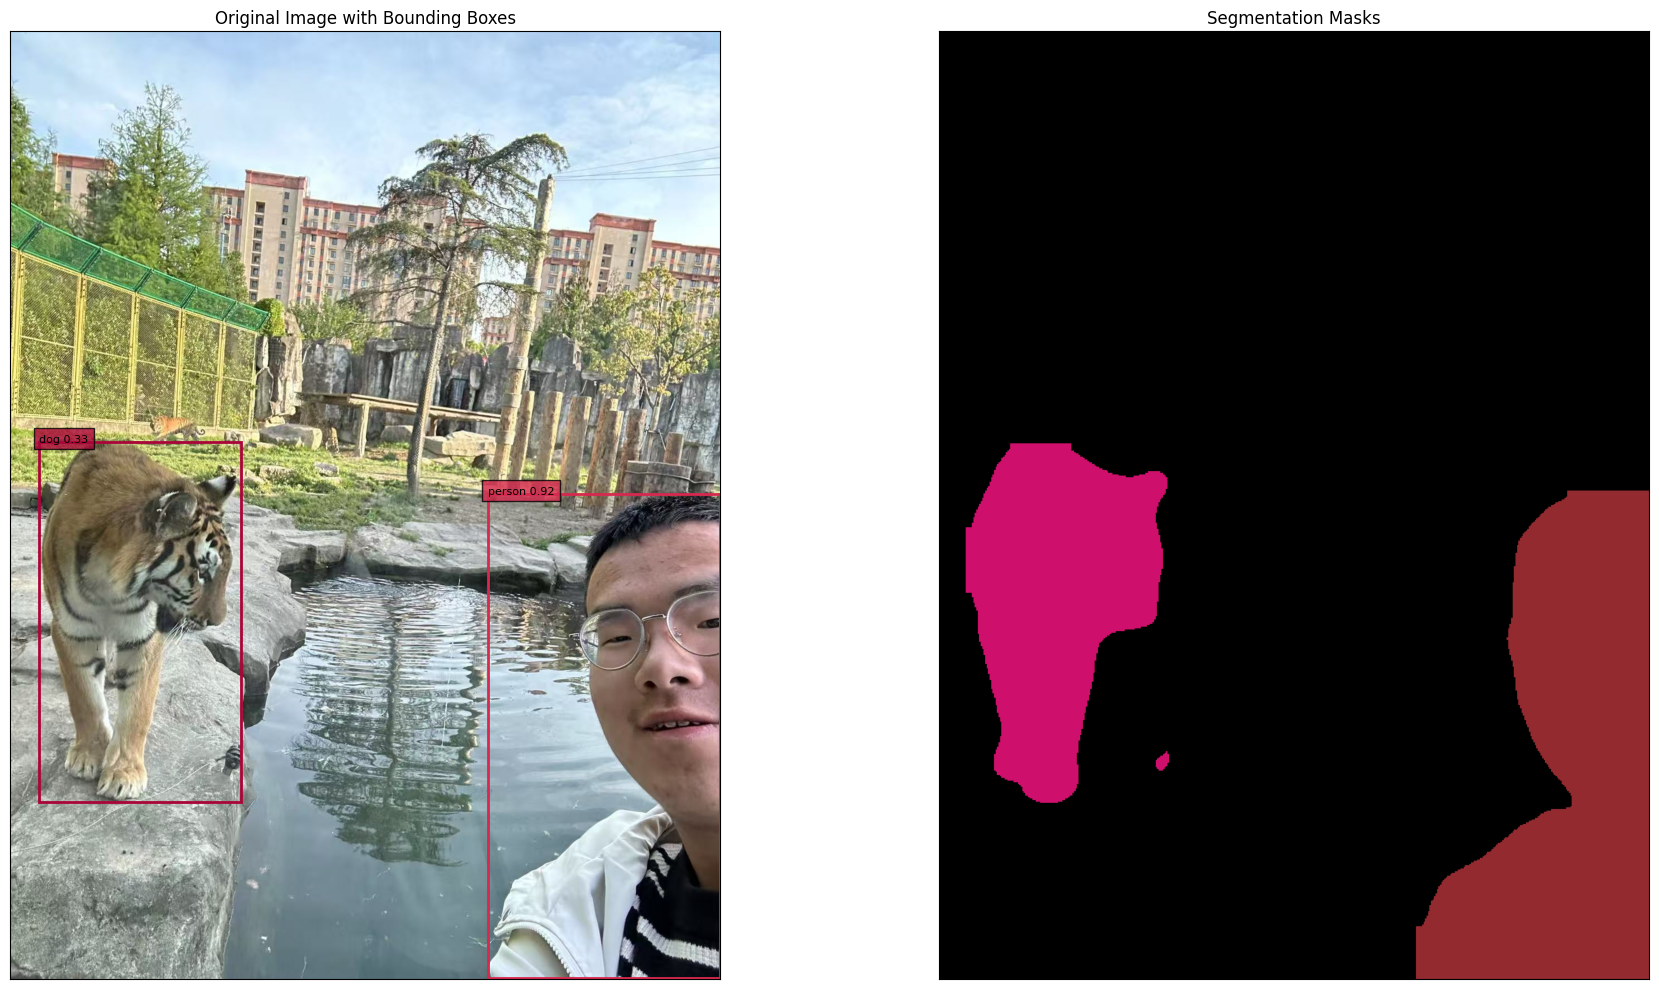

In [17]:
from matplotlib import pyplot as plt
import cv2  # 新增：用于调整掩码尺寸

# 生成左右两个子图：边框 + mask
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# <1> 显示原图 + 检测框
ax1.imshow(original_image_np)
ax1.set_title("Original Image with Bounding Boxes")
ax1.set_xticks([])
ax1.set_yticks([])

# 遍历每个检测结果
for r in results:
    boxes = r.boxes.data.cpu().numpy()
    
    # 添加边框
    for box in boxes:
        color = np.random.rand(3)
        x1, y1, x2, y2 = box[:4]
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2)
        ax1.add_patch(rect)
        
        cls = int(box[5])
        label = f"{model.names[cls]} {box[4]:.2f}"
        ax1.text(x1, y1, label, fontsize=8, bbox=dict(facecolor=color, alpha=0.8))

# <2> 创建一个和原图大小相同的全黑图像
mask_image = np.zeros_like(original_image_np)
ax2.imshow(mask_image)
ax2.set_title("Segmentation Masks")
ax2.set_xticks([])
ax2.set_yticks([])

# 获取原图尺寸
original_height, original_width = original_image_np.shape[:2]

# 遍历每个检测结果
for r in results:
    masks = r.masks.data.cpu().numpy()
    
    # 遍历每个检测结果的每个目标，画出边框和mask
    for mask in masks:
        color = np.random.rand(3)
        
        # --------------------------
        # 关键修改：调整掩码尺寸以匹配原图
        # --------------------------
        # 将掩码调整为原图尺寸
        resized_mask = cv2.resize(
            mask, 
            (original_width, original_height),  # 目标尺寸
            interpolation=cv2.INTER_NEAREST     # 保持二值性
        )
        resized_mask = resized_mask.reshape(original_height, original_width, 1)
        
        # 生成彩色mask
        colored_mask = resized_mask * color.reshape(1, 1, -1)
        
        # 更新mask_image
        mask_image = np.where(resized_mask, colored_mask, mask_image)

# 显示分割mask图
ax2.imshow(mask_image)

plt.tight_layout()
plt.show()


image 1/1 /mnt/workspace/卷积神经网网络的应用/数据集/zoo2.jpg: 640x480 1 person, 1 dog, 13.0ms
Speed: 1.6ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


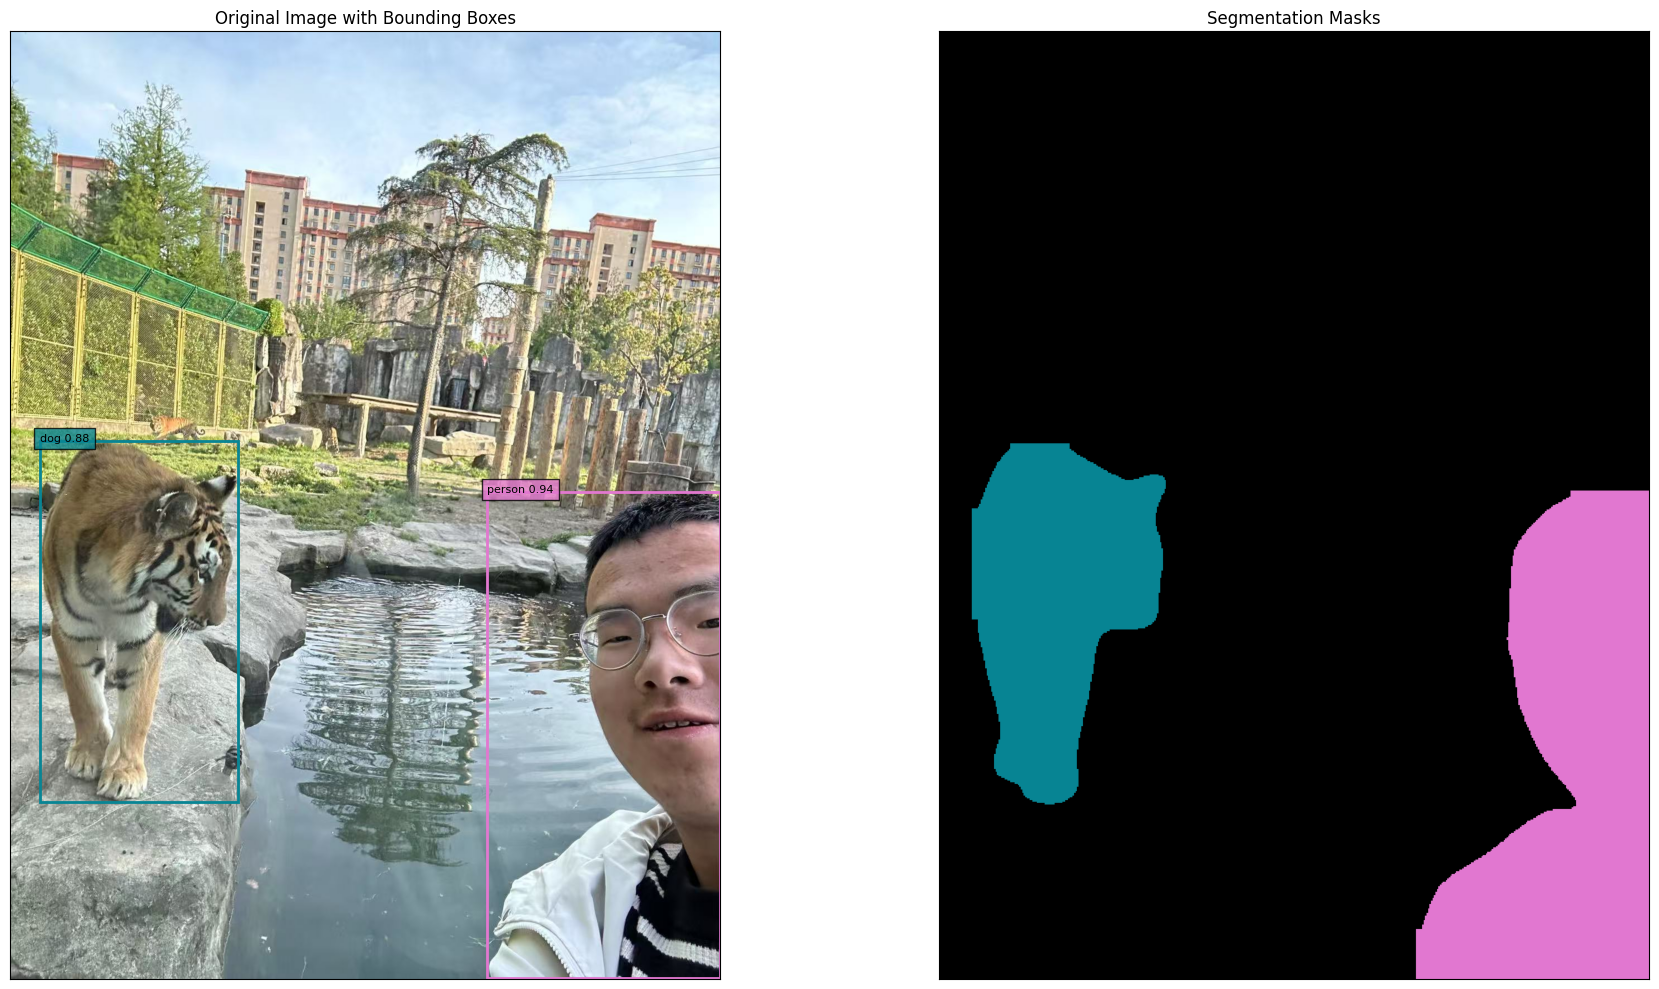

In [19]:
# ========下面代码与上面的运行结果一样，只是将边框检测、语义分割放到一个for循环中========
# 用yolo11模型进行目标检测
from ultralytics import YOLO
import cv2

# 加载官方预训练模型，下载后放置在当前目录下
model = YOLO("yolo11l-seg.pt")  # 大模型

# 用模型对自己的图片进行目标检测
results = model("/mnt/workspace/卷积神经网网络的应用/数据集/zoo2.jpg") 

# 显示检测结果：目标检测框 + 分割mask图
# 打开原因图片
original_image = Image.open("/mnt/workspace/卷积神经网网络的应用/数据集/zoo2.jpg")
# 转换为numpy数组
original_image_np = np.array(original_image)

# 生成左右两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# 显示原图 + 检测框
ax1.imshow(original_image_np)
ax1.set_title("Original Image with Bounding Boxes")
# 去掉坐标轴
ax1.set_xticks([])
ax1.set_yticks([])

# Display masks separately

# 创建一个和原图大小相同的全黑图像
mask_image = np.zeros_like(original_image_np)
ax2.imshow(mask_image)
ax2.set_title("Segmentation Masks")
ax2.set_xticks([])
ax2.set_yticks([])

original_height, original_width = original_image_np.shape[:2]

# 遍历每个检测结果
for r in results:
    # 边框 + mask
    boxes = r.boxes.data.cpu().numpy()
    masks = r.masks.data.cpu().numpy()
    
    # 遍历每个检测结果的每个目标，画出边框和mask
    for i, mask in enumerate(masks):
        # 边框颜色为随机颜色
        color = np.random.rand(3)
        
        # Draw bounding box on original image
        x1, y1, x2, y2 = boxes[i][:4]
        rect = plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor=color, linewidth=2)
        ax1.add_patch(rect)
        
        # Add label to original image
        cls = int(boxes[i][5])
        label = f"{model.names[cls]} {boxes[i][4]:.2f}"
        ax1.text(x1, y1, label, fontsize=8, bbox=dict(facecolor=color, alpha=0.8))
        
        # Create colored mask
        resized_mask = cv2.resize(
            mask, 
            (original_width, original_height),  # 目标尺寸
            interpolation=cv2.INTER_NEAREST     # 保持二值性
        )
        resized_mask = resized_mask.reshape(original_height, original_width, 1)
        h, w = mask.shape[-2:]
        
        colored_mask = resized_mask * color.reshape(1, 1, -1)  # 使用 resized_mask
        # Add mask to the separate mask image
        mask_image = np.where(resized_mask, colored_mask, mask_image)

# 显示分割mask图
ax2.imshow(mask_image)

# 去掉坐标轴
ax2.set_xticks([])
ax2.set_yticks([])

plt.tight_layout()
plt.show()